<a href="https://colab.research.google.com/github/srinivasanibmbangalore/MIT_DataVisualization/blob/main/IntroductionToMatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
__author__ = "Srinivasan Subramaniam"
__status__ = "A gentle introduction to Visualization with matplotlib:  2nd October 2021"

'''
This is taken from a hackathon organized by Analytics Vidhya. All credits to them.

Our client is a meal delivery company which operates in multiple cities. 
They have various fulfillment centers in these cities for dispatching meal 
orders to their customers. The client wants us  to help these centers with 
demand forecasting for upcoming weeks so that these centers will plan 
the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and 
since the raw material is perishable, the procurement planning is of utmost importance. 
Secondly, staffing of the centers is also one area wherein accurate demand forecasts 
are really helpful. 
'''

'\nThis is taken from a hackathon organized by Analytics Vidhya. All credits to them.\n\nOur client is a meal delivery company which operates in multiple cities. \nThey have various fulfillment centers in these cities for dispatching meal \norders to their customers. The client wants us  to help these centers with \ndemand forecasting for upcoming weeks so that these centers will plan \nthe stock of raw materials accordingly.\n\nThe replenishment of majority of raw materials is done on weekly basis and \nsince the raw material is perishable, the procurement planning is of utmost importance. \nSecondly, staffing of the centers is also one area wherein accurate demand forecasts \nare really helpful. \n'

### About the data-sets

There are three data files. Weekly Demand data (train.csv): Contains the historical demand data for all centers

Data Dictionary of train.csv
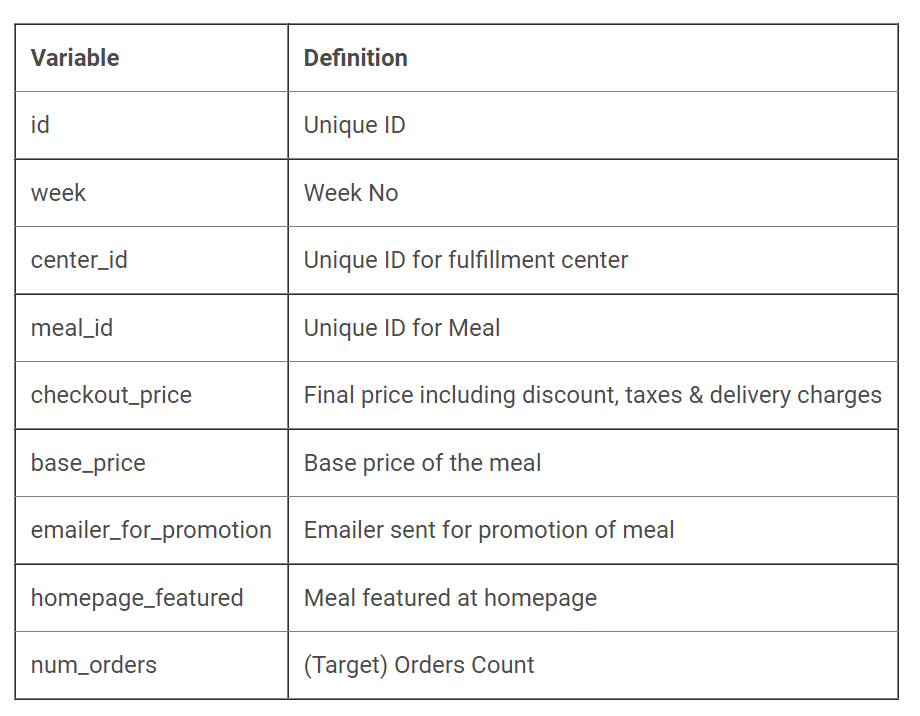


fulfilment_center_info.csv: Contains information for each fulfilment center

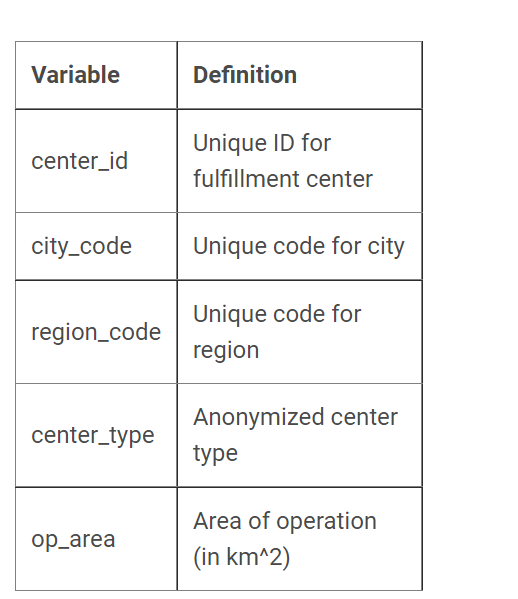

meal_info.csv: Contains information for each meal being served

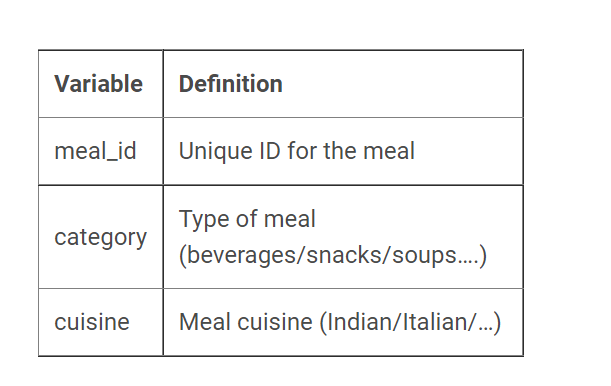

##### These datasets are placed in Srinivasan's google drive in the folder 'mit_class/visualization'. The snippet below demonstrates how to read data files from these folders.

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
file_path = '/content/gdrive/My Drive/mit_class/visualization'
train_file_path=file_path+'/train.csv'
meal_info_path=file_path+'/meal_info.csv'
fulfilment_center_info_path=file_path+'/fulfilment_center_info.csv'


Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [4]:
# Check if you are able to read the file properly
import pandas as pd
df_meal = pd.read_csv(meal_info_path)
df_center = pd.read_csv(fulfilment_center_info_path)
df_food = pd.read_csv(train_file_path)

df_food.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [5]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.2.2
0.11.2


In [6]:
'''
first merge all the three dataframes into a single dataframe. 
This will make it easier to manipulate the data while plotting it:

'''
df_merged = pd.merge(df_food,df_center,on='center_id') 
df_merged = pd.merge(df_merged,df_meal,on='meal_id')
df_merged.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


### Box and Whisker Plots

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


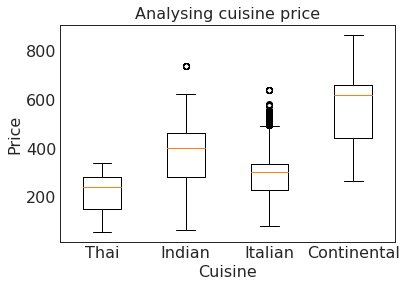

In [7]:
'''
Box plot gives statistical information about the distribution of numeric 
data divided into different groups. 
It is useful for detecting outliers within each group.
A Box Plot is the visual representation of the statistical five number summary of a given data set.

A Five Number Summary includes:

Minimum
First Quartile
Median (Second Quartile)
Third Quartile
Maximum

Note: Box plot does not show the distribution of data points within each group
We have to use Histogram Plot for the same.
It is easy to confuse histograms with bar plots. But remember, 
histograms are used with continuous data whereas bar plots are used with categorical data.
'''

#dictionary for base price per cuisine
c_price = {}
for i in df_merged['cuisine'].unique():
    c_price[i] = df_merged[df_merged['cuisine']==i].base_price

#plotting boxplot 
plt.boxplot([x for x in c_price.values()],labels=[x for x in c_price.keys()]) 

#x and y-axis labels 
plt.xlabel('Cuisine') 
plt.ylabel('Price') 

#plot title 
plt.title('Analysing cuisine price') 
plt.show()

Continental cuisine was the most expensive cuisine served by the company! Even its median price is higher than the maximum price of all the cuisines.



In [8]:
df_numeric_columns = df_merged[['checkout_price','base_price','num_orders','cuisine']]
df_numeric_columns.head()

,checkout_price,base_price,num_orders,cuisine
0,136.83,152.29,177,Thai
1,135.83,152.29,323,Thai
2,132.92,133.92,96,Thai
3,135.86,134.86,163,Thai
4,146.50,147.50,215,Thai


In [9]:
len(df_numeric_columns)

456548

<Figure size 800x640 with 0 Axes>

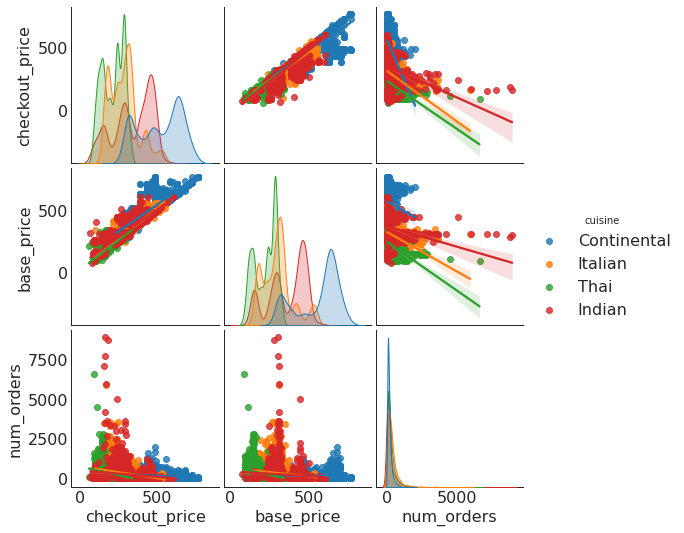

In [10]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df_numeric_columns.sample(10000), kind="reg", hue="cuisine")
plt.show()


### Sales performance week by week and month on month.A line plot is useful for visualizing the trend in a numerical value over a continuous time interval.



In [11]:
'''
A function defined to calculate the weekly and monthly sales
We will create two lists for storing the week-wise and month-wise 
revenue of the company.

'''
def calculateRevenue(df):

  df['revenue'] = df.apply(lambda x: x.checkout_price*x.num_orders,axis=1) 
  #new month column 
  df['month'] = df['week'].apply(lambda x: x//4) 
  #list to store month-wise revenue 
  month=[] 
  month_order=[] 

  for i in range(max(df['month'])):
      month.append(i) 
      month_order.append(df[df['month']==i].revenue.sum())

  #list to store week-wise revenue 
  week=[] 
  week_order=[] 

  for i in range(max(df['week'])): 
      week.append(i) 
      week_order.append(df[df['week']==i].revenue.sum())
  
  return month,month_order,week,week_order


## Line plot depicting weekly and monthly sales

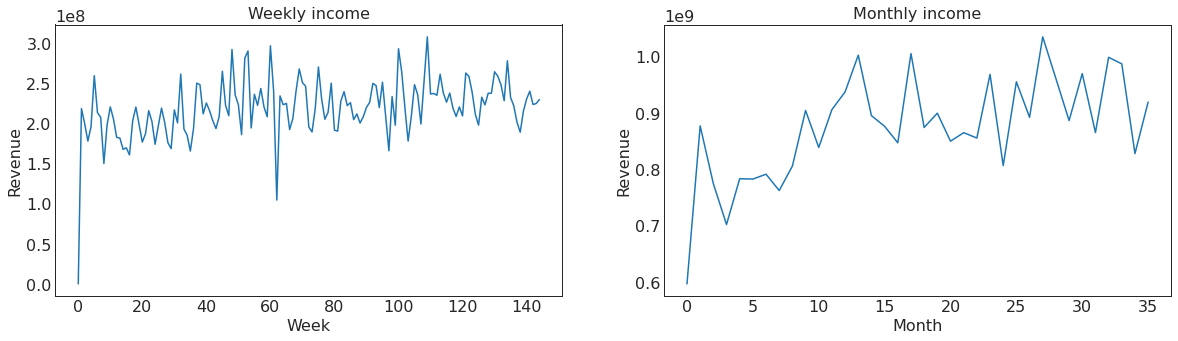

In [12]:
month,month_order,week,week_order = calculateRevenue(df_merged)

#subplots returns a Figure and an Axes object 
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5)) 

#manipulating the first Axes 
ax[0].plot(week,week_order) 
ax[0].set_xlabel('Week') 
ax[0].set_ylabel('Revenue') 
ax[0].set_title('Weekly income') 

#manipulating the second Axes 
ax[1].plot(month,month_order) 
ax[1].set_xlabel('Month') 
ax[1].set_ylabel('Revenue') 
ax[1].set_title('Monthly income')

plt.show();

We can see an increasing trend in the number of food orders with the number of weeks and months, though the trend is not very strong

### Which is the most popular food item served
by this company.

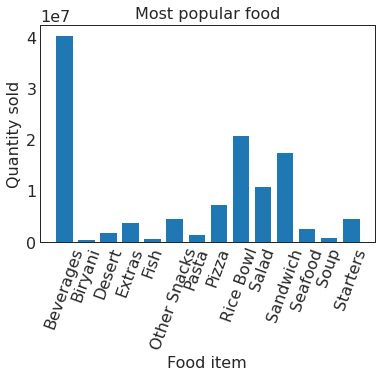

In [13]:
table = pd.pivot_table(data=df_merged,index='category',values='num_orders',aggfunc=np.sum)
#bar graph
plt.bar(table.index,table['num_orders'])

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Food item') 

#y-axis labels 
plt.ylabel('Quantity sold') 

#plot title 
plt.title('Most popular food') 
plt.show()


While analyzing the plot, we can see that Beverages were the most popular food item sold by the company. Wait, was it because they were sold with almost all the meals? Was Rice Bowl the most popular food item?

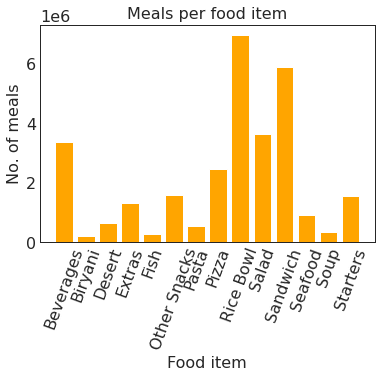

In [14]:
#dictionary for meals per food item
item_count = {}

for i in range(table.index.nunique()):
    item_count[table.index[i]] = table.num_orders[i]/df_meal[df_meal['category']==table.index[i]].shape[0]

#bar plot 
plt.bar([x for x in item_count.keys()],[x for x in item_count.values()],color='orange')

#adjust xticks
plt.xticks(rotation=70)

#label x-axis
plt.xlabel('Food item')

#label y-axis
plt.ylabel('No. of meals')

#label the plot
plt.title('Meals per food item')
plt.show()

***Rice Bowl was indeed the most popular food item sold by the company***

Let us explore whether the center type had any effect on the number of orders from different center types. We will do this by comparing a scatter plot, a boxplot and a bar graph in the same figure.

Scatter plots are useful for showing the relationship between two variables. Any correlation between variables or outliers in the data can be easily spotted using scatter plots

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


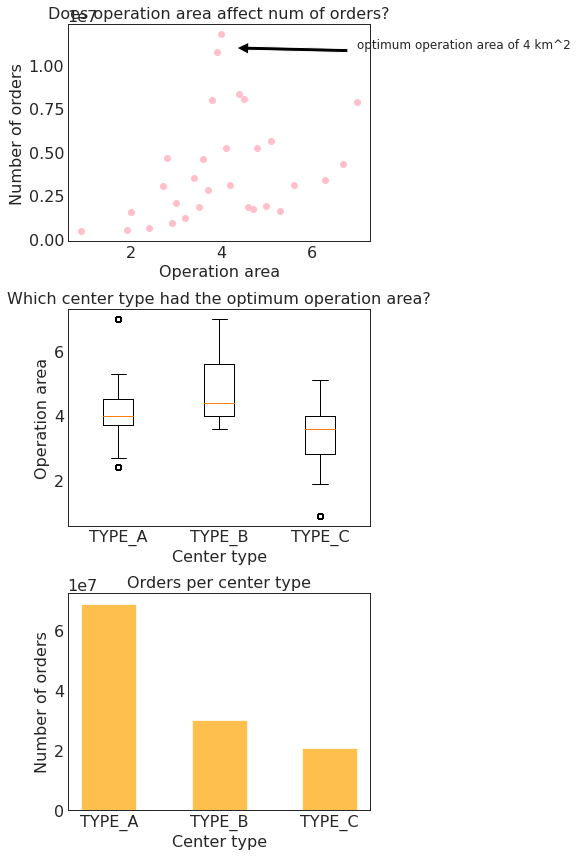

In [15]:
center_type_name = ['TYPE_A','TYPE_B','TYPE_C'] 

#relation between op area and number of orders 
op_table=pd.pivot_table(df_merged,index='op_area',values='num_orders',aggfunc=np.sum) 

#relation between center type and op area 
c_type = {} 
for i in center_type_name: 
    c_type[i] = df_merged[df_merged['center_type']==i].op_area 

#relation between center type and num of orders 
center_table=pd.pivot_table(df_merged,index='center_type',values='num_orders',aggfunc=np.sum) 

#subplots 
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,12)) 

#scatter plots 
ax[0].scatter(op_table.index,op_table['num_orders'],color='pink') 
ax[0].set_xlabel('Operation area') 
ax[0].set_ylabel('Number of orders') 
ax[0].set_title('Does operation area affect num of orders?') 
ax[0].annotate('optimum operation area of 4 km^2',xy=(4.2,1.1*10**7),xytext=(7,1.1*10**7),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=12) 

#boxplot 
ax[1].boxplot([x for x in c_type.values()], labels=[x for x in c_type.keys()]) 
ax[1].set_xlabel('Center type') 
ax[1].set_ylabel('Operation area') 
ax[1].set_title('Which center type had the optimum operation area?') 

#bar graph 
ax[2].bar(center_table.index,center_table['num_orders'],alpha=0.7,color='orange',width=0.5) 
ax[2].set_xlabel('Center type') 
ax[2].set_ylabel('Number of orders') 
ax[2].set_title('Orders per center type') 

#show figure 
plt.tight_layout() 
plt.show();

The optimum operation area of a center is 4 km sq. The boxplot shows that the TYPE_A center type had the most number of optimum size centers because of a compact box with a median around 4 km sq. Because of this, they had more orders placed by customers than any other center type.